# 6.6 Sourcing & Analyzing Time Series Data

# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

# Loading and checking the data

In [2]:
import pandas as pd
import os

# Define the path to the directory
path = '/Users/marika/'

# Read the CSV file using os.path.join()
df_clustered = pd.read_csv(os.path.join(path, 'crude suicide rate per 100K copy.csv'))

# Display the first few rows of the DataFrame to verify it loaded correctly
print(df_clustered.head())

              Location  Year         Sex  FactValueNumeric
0  Antigua and Barbuda  2019        Male              0.00
1             Barbados  2019      Female              0.32
2  Antigua and Barbuda  2019  Both sexes              0.39
3             Barbados  2019  Both sexes              0.62
4              Grenada  2019        Male              0.59


# Choosing data points

In [4]:
# Select only the 'year' and 'value'
yr_value_df = df_clustered[['Year', 'FactValueNumeric']]

In [5]:
yr_value_df

,Year,FactValueNumeric
0,2019,0.00
1,2019,0.32
2,2019,0.39
3,2019,0.62
4,2019,0.59
...,...,...
10975,2000,9.77
10976,2000,9.84
10977,2000,9.90
10978,2000,9.94


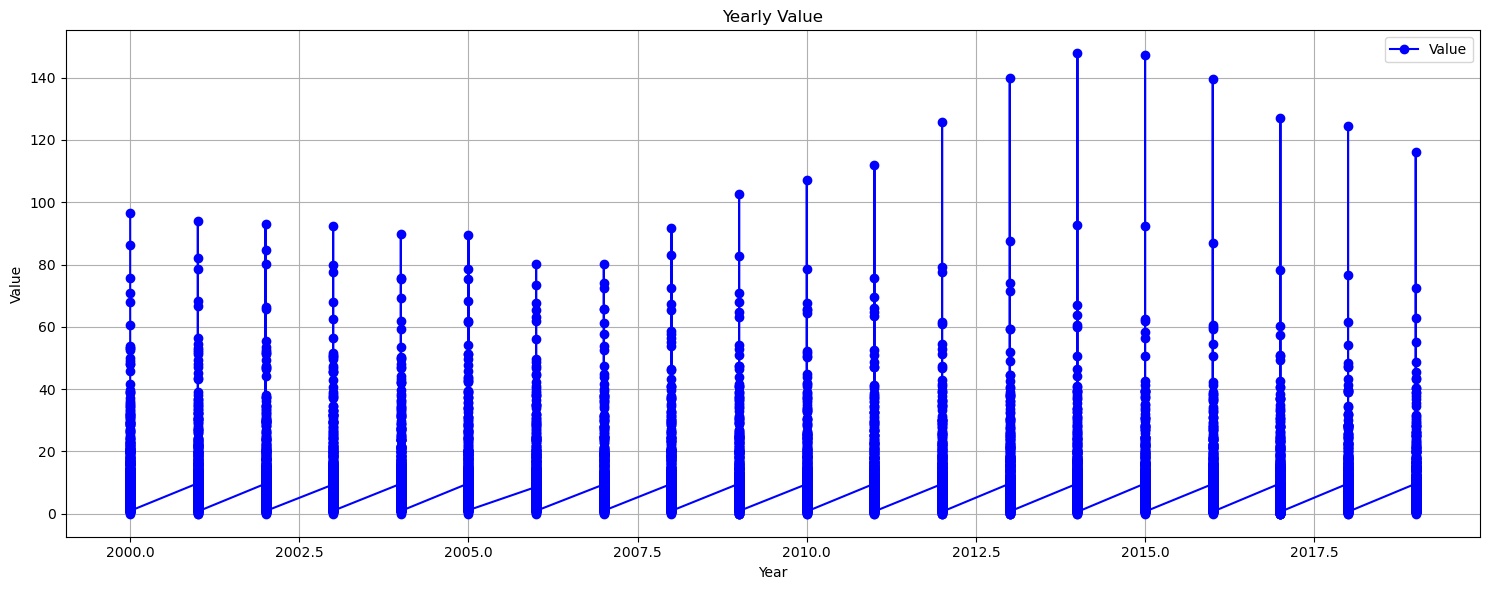

In [9]:
import matplotlib.pyplot as plt

# Sort DataFrame by 'year'
yr_value_df = yr_value_df.sort_values(by='Year')

plt.figure(figsize=(15, 6))  # Adjust the figure size if needed

# Plotting 'year' against 'value'
plt.plot(yr_value_df['Year'], yr_value_df['FactValueNumeric'], marker='o', linestyle='-', color='b', label='Value')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Yearly Value')
plt.grid(True)  # Add grid lines for better readability
plt.legend()  # Show legend based on label 'Value'

# Show plot
plt.tight_layout()  # Adjust layout for better fit of labels
plt.show()

# Times series analysis - decomposition

In [10]:
years = yr_value_df['Year']  # Extracting 'year' column
values = yr_value_df['FactValueNumeric']  # Extracting 'value' column

In [11]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [12]:
decomposition = seasonal_decompose(yr_value_df['FactValueNumeric'], model='additive', period=1)

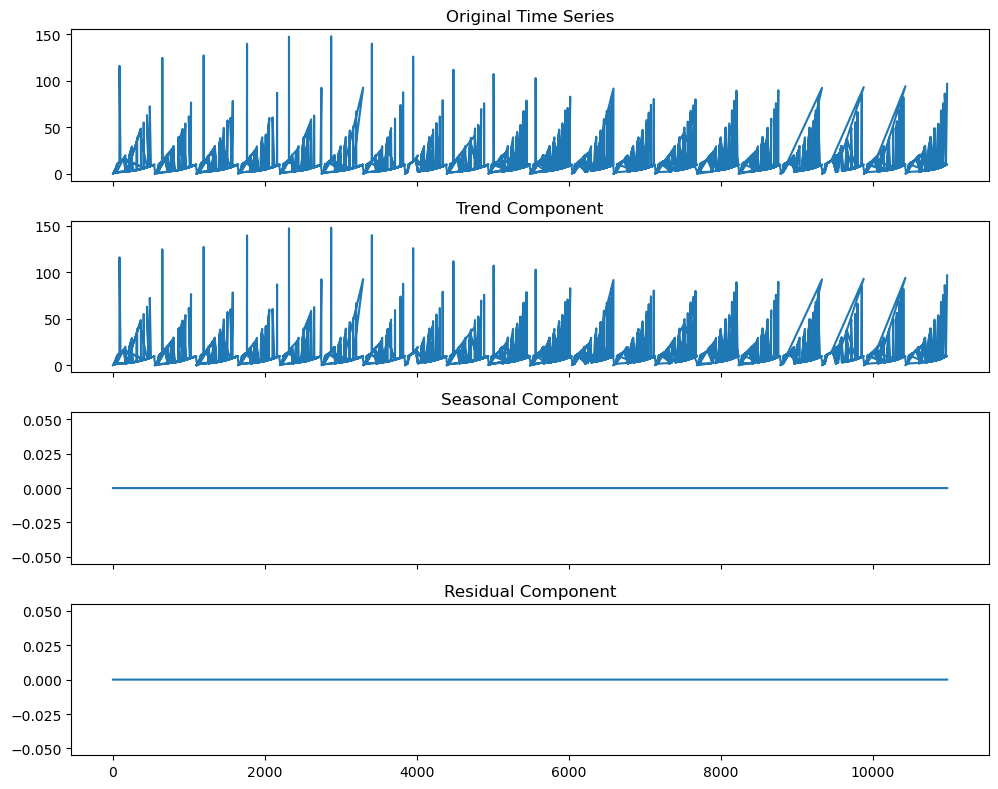

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

yr_value_df['FactValueNumeric'].plot(ax=ax1)
ax1.set_title('Original Time Series')

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')

plt.tight_layout()
plt.show()

In [15]:
# Group by Year and calculate the mean suicide rate
yr_value_df = df_clustered.groupby('Year')['FactValueNumeric'].mean().reset_index()

# Ensure data is ordered by Year
yr_value_df = yr_value_df.sort_values(by='Year')

# Set Year as index for time series analysis
yr_value_df.set_index('Year', inplace=True)

In [16]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(yr_value_df['FactValueNumeric'], model='additive', period=1)  # Adjust 'period' as needed

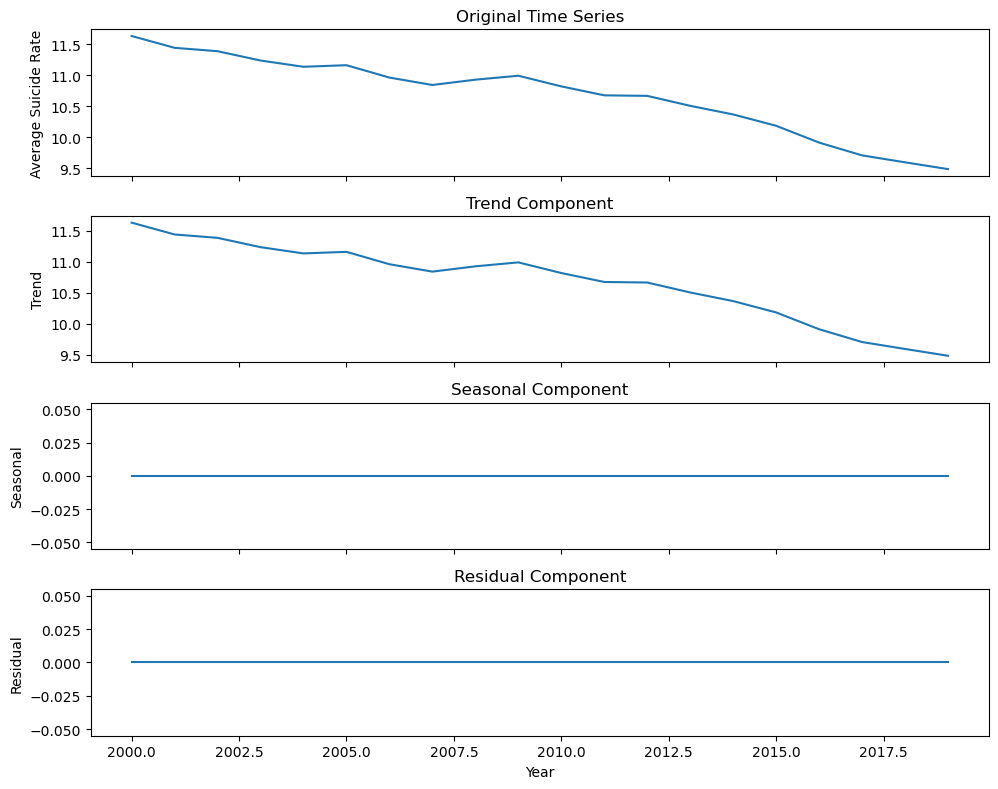

In [17]:
# Plotting the original time series and its components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original time series
yr_value_df['FactValueNumeric'].plot(ax=ax1)
ax1.set_title('Original Time Series')
ax1.set_ylabel('Average Suicide Rate')

# Trend component
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend Component')
ax2.set_ylabel('Trend')

# Seasonal component
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal Component')
ax3.set_ylabel('Seasonal')

# Residual component
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual Component')
ax4.set_ylabel('Residual')

plt.tight_layout()
plt.show()